# Credit Risk Project for KPMG Challenge

This is the code I developed for a university project. The assignment was to explore the applications of machine learning in the credit industry, and I performed a comparison among Logistic Regression, Random Forest, and Artificial Neural Networks for predicting defaults. The corresponding presentation is available in the file 'Team_5_PPT_KPMG_Challenge.pdf'."

In [1]:
# Basic Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

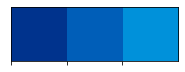

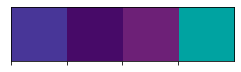

In [2]:
# KPMG color palette for plots
primary = ['#00338D','#005EB8','#0091DA']
secondary = ['#483698','#470A68','#6D2077','#00A3A1']
sns.palplot(sns.color_palette(primary))
sns.palplot(sns.color_palette(secondary))
prim_pal = ListedColormap(sns.color_palette(primary))
second_pal = ListedColormap(sns.color_palette(secondary))

# Data Preprocessing

In this section, I import the dataset that contains information about loans. The target variable is 'loan_status,' which is a binary variable indicating whether a default has occurred.

In [3]:
# Import the dataset, in this dataset the target variable is loan_status
# the variable bcpersonedefaultonfile takes into account if he previously defaulted on a credit
df = pd.read_csv('Credit_Risk_Dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
# Since ownership and intent are cathegorical variables, I transform them
# in dummy variable format
ownship = pd.get_dummies(df.person_home_ownership,prefix='ownship')
intent = pd.get_dummies(df.loan_intent,prefix='loan_int')

In [5]:
# Join the dataframes and delete the previous variables + the RENT and VENTURE dummy since they are redundant
df = df.join(ownship)
df = df.join(intent)
df.drop(labels=['loan_intent','person_home_ownership','ownship_RENT','loan_int_VENTURE'],axis=1,inplace=True)
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ownship_MORTGAGE,ownship_OTHER,ownship_OWN,loan_int_DEBTCONSOLIDATION,loan_int_EDUCATION,loan_int_HOMEIMPROVEMENT,loan_int_MEDICAL,loan_int_PERSONAL
0,22,59000,123.0,D,35000,16.02,1,0.59,Y,3,0,0,0,0,0,0,0,1
1,21,9600,5.0,B,1000,11.14,0,0.10,N,2,0,0,1,0,1,0,0,0
2,25,9600,1.0,C,5500,12.87,1,0.57,N,3,1,0,0,0,0,0,1,0
3,23,65500,4.0,C,35000,15.23,1,0.53,N,2,0,0,0,0,0,0,1,0
4,24,54400,8.0,C,35000,14.27,1,0.55,Y,4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,C,5800,13.16,0,0.11,N,30,1,0,0,0,0,0,0,1
32577,54,120000,4.0,A,17625,7.49,0,0.15,N,19,1,0,0,0,0,0,0,1
32578,65,76000,3.0,B,35000,10.99,1,0.46,N,28,0,0,0,0,0,1,0,0
32579,56,150000,5.0,B,15000,11.48,0,0.10,N,26,1,0,0,0,0,0,0,1


In [6]:
# Encode the rating of the loan, the ordering here matters so we just go from 0 - G (the worst) to 6 - A (The best)
# We also encode the historical default
for i in range(0,32581):
    if df.loc[i,'loan_grade'] == 'A':
        df.loc[i,'loan_grade'] = 6
    elif df.loc[i,'loan_grade'] == 'B':
        df.loc[i,'loan_grade'] = 5
    elif df.loc[i,'loan_grade'] == 'C':
        df.loc[i,'loan_grade'] = 4
    elif df.loc[i,'loan_grade'] == 'D':
        df.loc[i,'loan_grade'] = 3
    elif df.loc[i,'loan_grade'] == 'E':
        df.loc[i,'loan_grade'] = 2
    elif df.loc[i,'loan_grade'] == 'F':
        df.loc[i,'loan_grade'] = 1
    elif df.loc[i,'loan_grade'] == 'G':
        df.loc[i,'loan_grade'] = 0

for i in range(0,32581):
    if df.loc[i,'cb_person_default_on_file'] == 'Y':
        df.loc[i,'cb_person_default_on_file'] = 1
    else:
        df.loc[i,'cb_person_default_on_file'] = 0        

In [7]:
# Fill the Na values with the median (for robustness)
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)
df['loan_int_rate'].fillna((df['loan_int_rate'].median()), inplace = True)

In [8]:
# Final dataset
df

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,ownship_MORTGAGE,ownship_OTHER,ownship_OWN,loan_int_DEBTCONSOLIDATION,loan_int_EDUCATION,loan_int_HOMEIMPROVEMENT,loan_int_MEDICAL,loan_int_PERSONAL
0,22,59000,123.0,3,35000,16.02,1,0.59,1,3,0,0,0,0,0,0,0,1
1,21,9600,5.0,5,1000,11.14,0,0.10,0,2,0,0,1,0,1,0,0,0
2,25,9600,1.0,4,5500,12.87,1,0.57,0,3,1,0,0,0,0,0,1,0
3,23,65500,4.0,4,35000,15.23,1,0.53,0,2,0,0,0,0,0,0,1,0
4,24,54400,8.0,4,35000,14.27,1,0.55,1,4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,4,5800,13.16,0,0.11,0,30,1,0,0,0,0,0,0,1
32577,54,120000,4.0,6,17625,7.49,0,0.15,0,19,1,0,0,0,0,0,0,1
32578,65,76000,3.0,5,35000,10.99,1,0.46,0,28,0,0,0,0,0,1,0,0
32579,56,150000,5.0,5,15000,11.48,0,0.10,0,26,1,0,0,0,0,0,0,1


# Machine Learning codes

After data preprocessing, I split the dataset into training and test samples. I allocate 80% of the observations to the training dataset.

In [9]:
# Create X and Y and split the dataset, standardize features and split into train/test
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:6].join(df.iloc[:,7:16]).values
y = df.iloc[:,6].values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5038   94]
 [1179  206]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5132
           1       0.69      0.15      0.24      1385

    accuracy                           0.80      6517
   macro avg       0.75      0.57      0.57      6517
weighted avg       0.78      0.80      0.75      6517



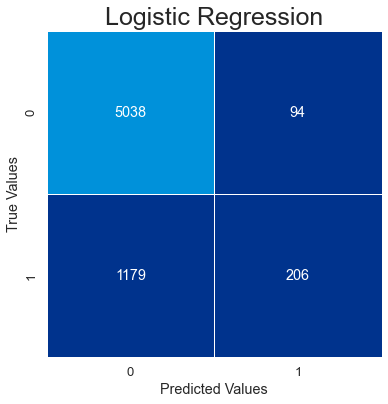

In [5]:
# Confusion Matrix plot for Logistic Regression
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
plot1 = sns.heatmap([[5038,94],[1179,206]],
                    annot=True,
                    fmt='d',
                    cbar=False,
                    linewidths=.5,
                    linecolor='white',
                    cmap=prim_pal)

plot1.set_xlabel('Predicted Values')
plot1.set_ylabel('True Values')
plot1.set_title('Logistic Regression',fontsize=25)
plt.savefig('charts/log_reg.png')


# Decision Tree with XGBoost

In [3]:
import xgboost as xgb
from xgboost import plot_tree, plot_importance
feat_names = ['Age',
 'Annual Income',
 'Employment Length',
 'Loan Grade',
 'Loan Amount',
 'Interest Rate',
 'Percentage on Income',
 'Previous Default',
 'Credit History Lenght',
 'ownship_MORTGAGE',
 'ownship_OTHER',
 'ownship_OWN',
 'loan_int_DEBTCONSOLIDATION',
 'loan_int_EDUCATION',
 'loan_int_HOMEIMPROVEMENT']

In [15]:
#Start of gradient boosted tree
xgb_model = xgb.XGBClassifier() # initialize tree

xgb_model.fit(X_train, np.ravel(y_train)) # train tree

predict_xgb = xgb_model.predict(X_test) # 1st col = pred val, 2nd col = pred prob

C:\Users\Antonio\anaconda3\envs\tensorflow-Keras\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:
print(confusion_matrix(y_test,predict_xgb))
print(classification_report(y_test,predict_xgb))

[[5060   72]
 [ 370 1015]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5132
           1       0.93      0.73      0.82      1385

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



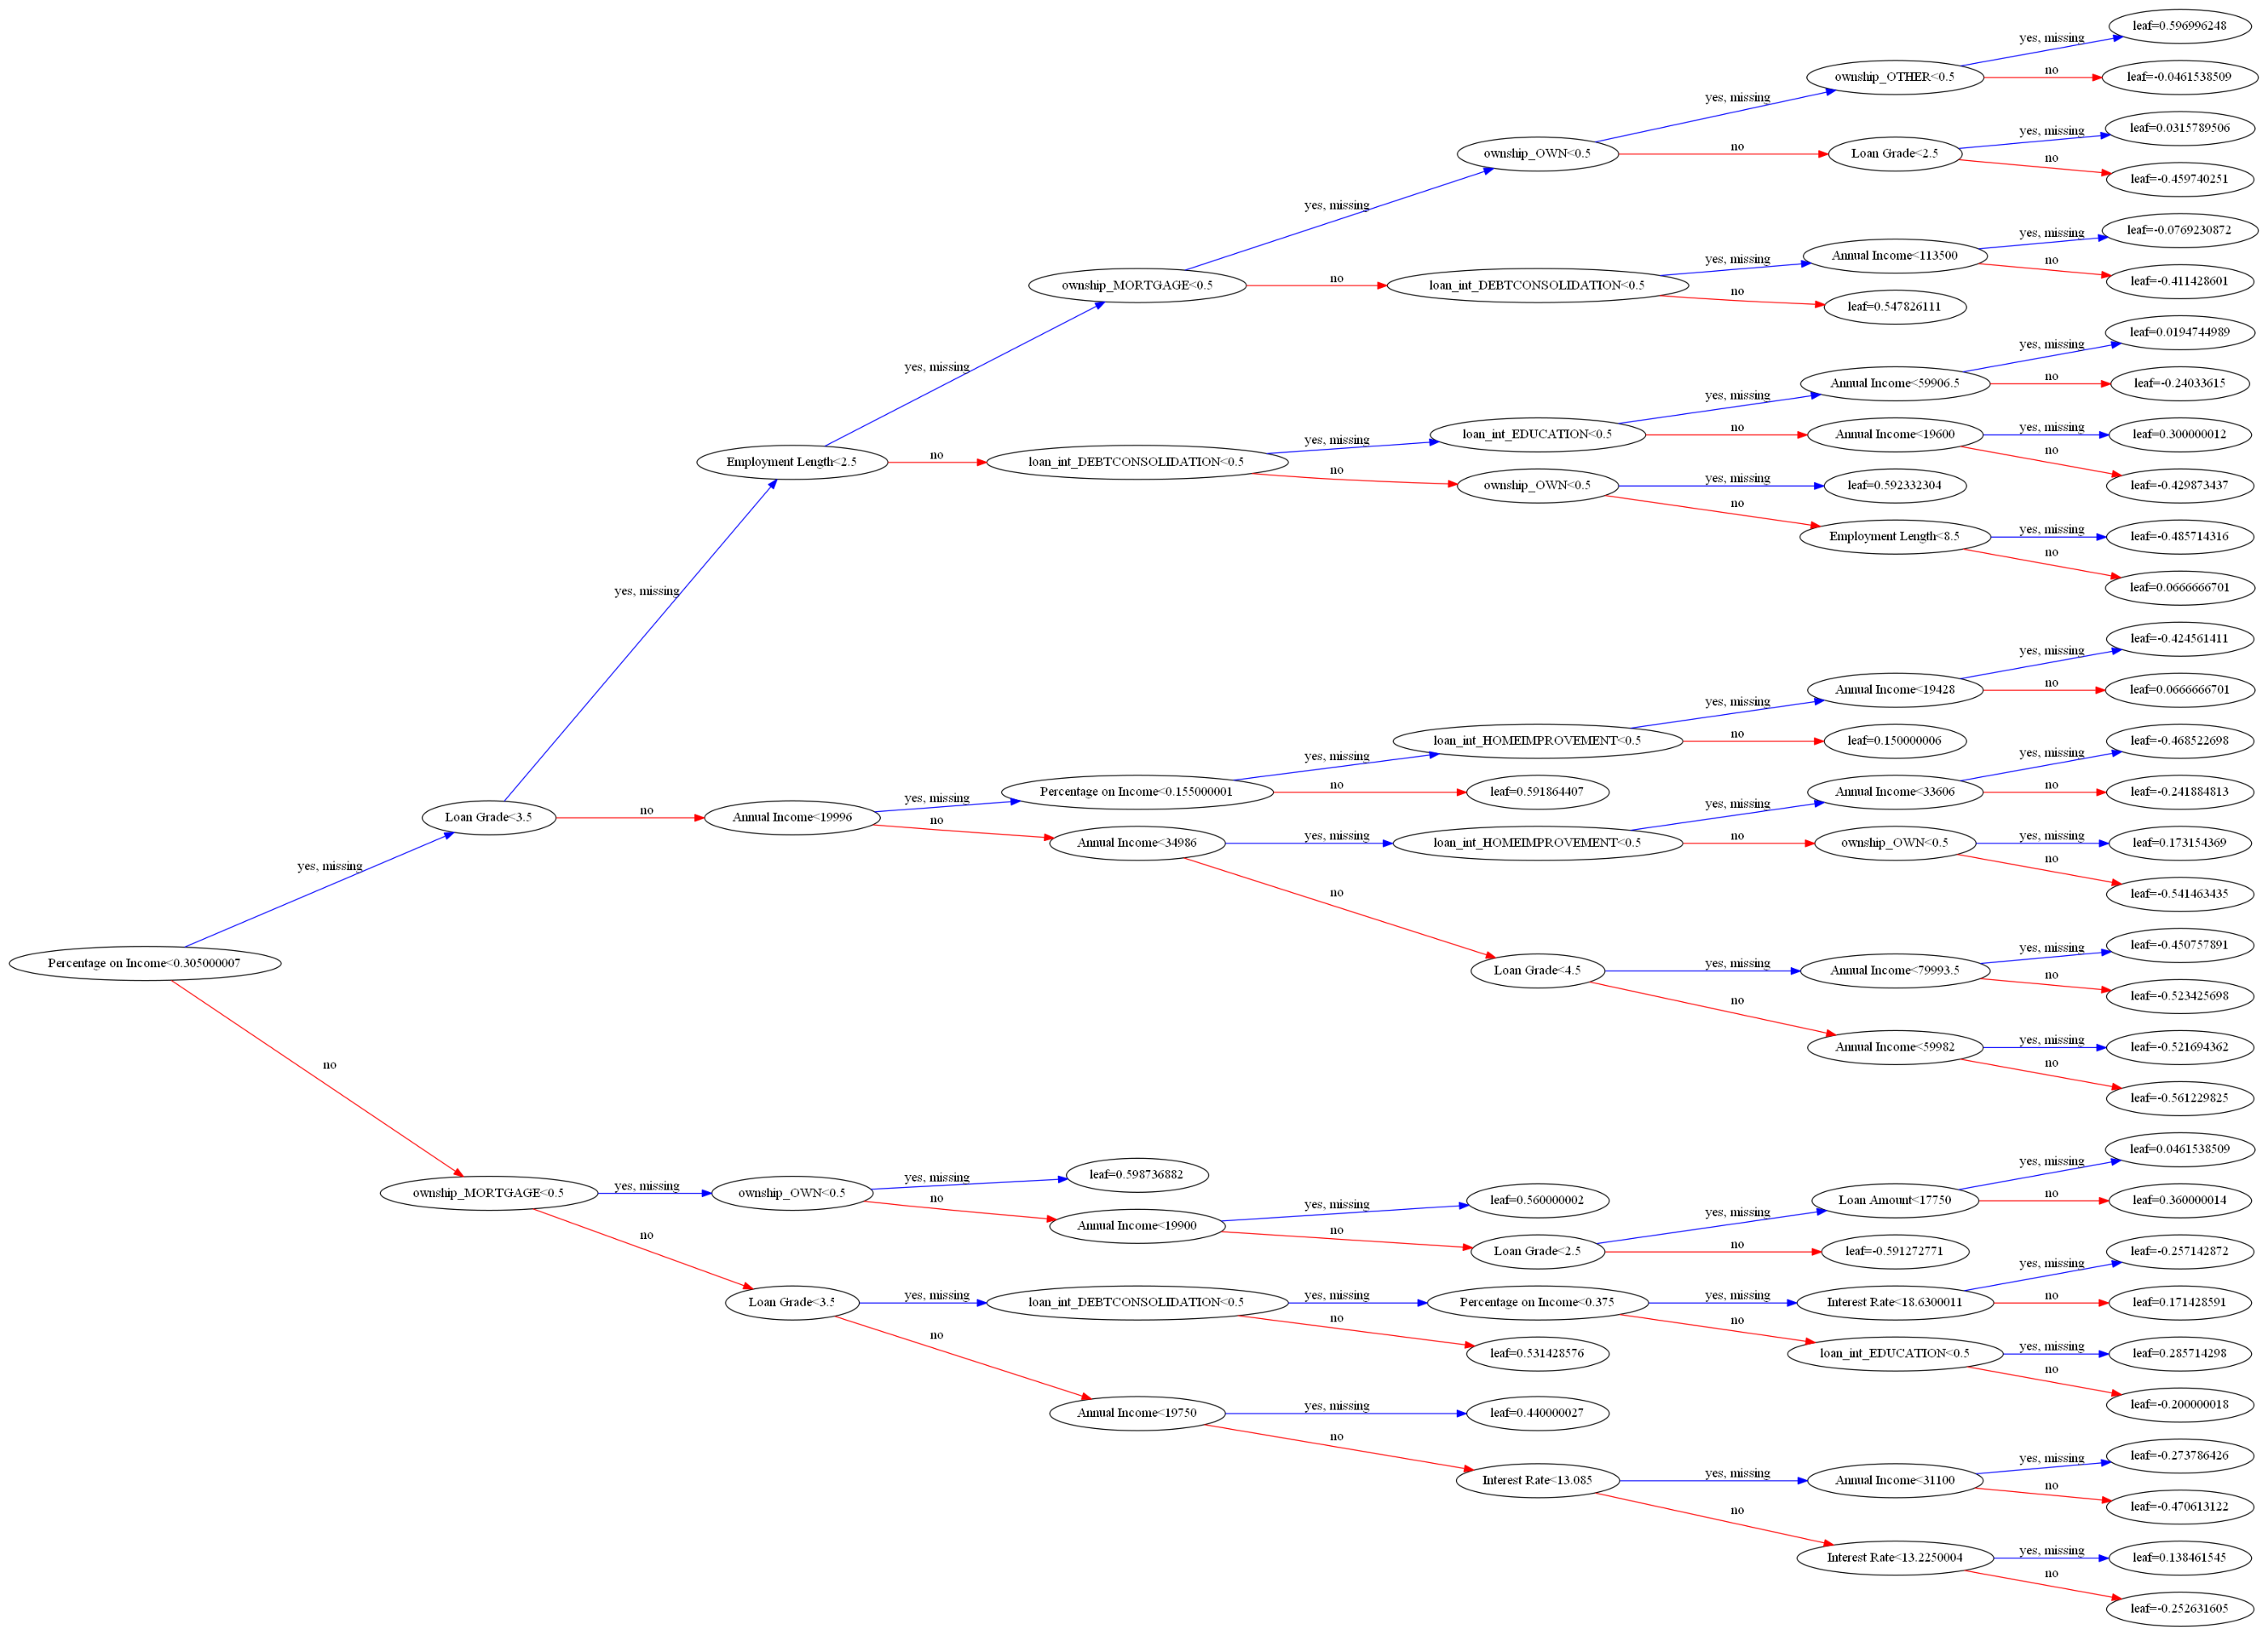

In [37]:
xgb_model.get_booster().feature_names = feat_names
xgb.plot_tree(xgb_model,rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(50, 50)
plt.rc('font', size=50)
plt.savefig('charts/decision_tree.png')

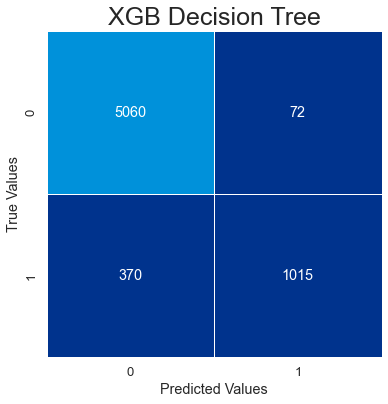

In [7]:
# Confusion Matrix plot for XGB
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
plot1 = sns.heatmap([[5060, 72],[370, 1015]],
                    annot=True,
                    fmt='d',
                    cbar=False,
                    linewidths=.5,
                    linecolor='white',
                    cmap=prim_pal)

plot1.set_xlabel('Predicted Values')
plot1.set_ylabel('True Values')
plot1.set_title('XGB Decision Tree',fontsize=25)
plt.savefig('charts/XGB.png')

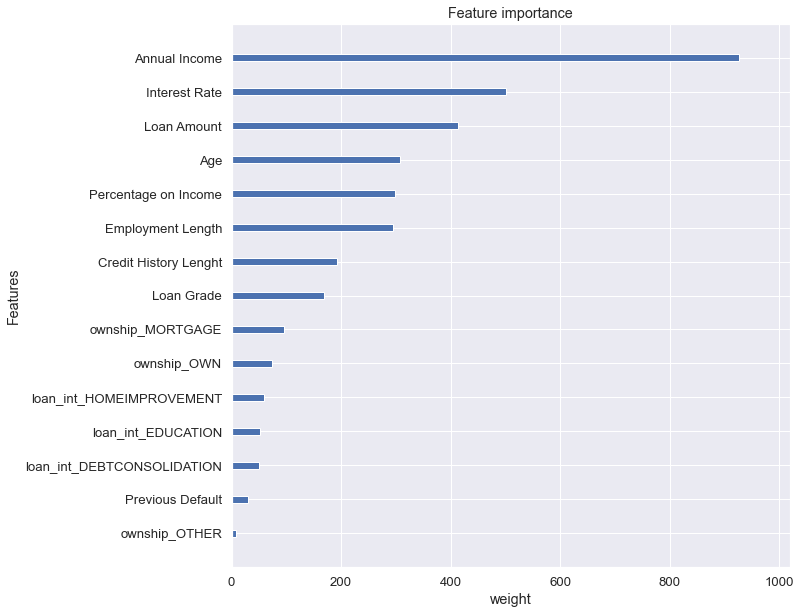

In [114]:
plot_importance(xgb_model,xlabel='weight',show_values=False)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.set_cmap('Blues')
plt.savefig('charts/Feature_Importance.png')

# Neural Network

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [70]:
# Neural Net
model = Sequential()
model.add(Dense(32, input_dim=15, activation='relu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
X_train = np.asarray(X_train).astype(np.float64)
X_test = np.asarray(X_test).astype(np.float64)
history = model.fit(X_train, y_train, epochs=100, batch_size=64,verbose=2)

Epoch 1/100
408/408 - 0s - loss: 162.3142 - accuracy: 0.7338
Epoch 2/100
408/408 - 0s - loss: 44.7256 - accuracy: 0.7343
Epoch 3/100
408/408 - 0s - loss: 38.3973 - accuracy: 0.7343
Epoch 4/100
408/408 - 0s - loss: 34.2328 - accuracy: 0.7357
Epoch 5/100
408/408 - 0s - loss: 38.2821 - accuracy: 0.7347
Epoch 6/100
408/408 - 0s - loss: 31.6429 - accuracy: 0.7337
Epoch 7/100
408/408 - 0s - loss: 37.2291 - accuracy: 0.7333
Epoch 8/100
408/408 - 0s - loss: 29.8525 - accuracy: 0.7359
Epoch 9/100
408/408 - 0s - loss: 25.7409 - accuracy: 0.7355
Epoch 10/100
408/408 - 0s - loss: 29.5733 - accuracy: 0.7353
Epoch 11/100
408/408 - 0s - loss: 26.4632 - accuracy: 0.7326
Epoch 12/100
408/408 - 0s - loss: 27.8623 - accuracy: 0.7370
Epoch 13/100
408/408 - 0s - loss: 26.3667 - accuracy: 0.7371
Epoch 14/100
408/408 - 0s - loss: 25.8631 - accuracy: 0.7397
Epoch 15/100
408/408 - 0s - loss: 21.3217 - accuracy: 0.7401
Epoch 16/100
408/408 - 0s - loss: 22.9747 - accuracy: 0.7358
Epoch 17/100
408/408 - 0s - loss

In [72]:
predNN = model.predict_classes(X_test)
predNN

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [73]:
print(confusion_matrix(y_test,predNN))
print(classification_report(y_test,predNN))

[[5112   20]
 [1275  110]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5132
           1       0.85      0.08      0.15      1385

    accuracy                           0.80      6517
   macro avg       0.82      0.54      0.52      6517
weighted avg       0.81      0.80      0.73      6517



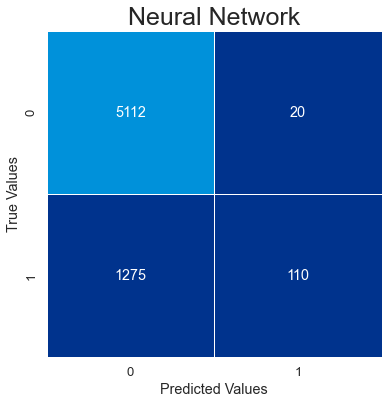

In [8]:
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
plot1 = sns.heatmap([[5112,20],[1275,110]],
                    annot=True,
                    fmt='d',
                    cbar=False,
                    linewidths=.5,
                    linecolor='white',
                    cmap=prim_pal)

plot1.set_xlabel('Predicted Values')
plot1.set_ylabel('True Values')
plot1.set_title('Neural Network',fontsize=25)
plt.savefig('charts/NN.png')

# Various Plots

In [75]:
accuracy = pd.DataFrame(data=[['Dec.Tree with XGBoost',0.93],['Neural Network',0.80],['Logistic Regression',0.69]])
accuracy

,0,1
0,Dec.Tree with XGBoost,0.93
1,Neural Network,0.85
2,Logistic Regression,0.69


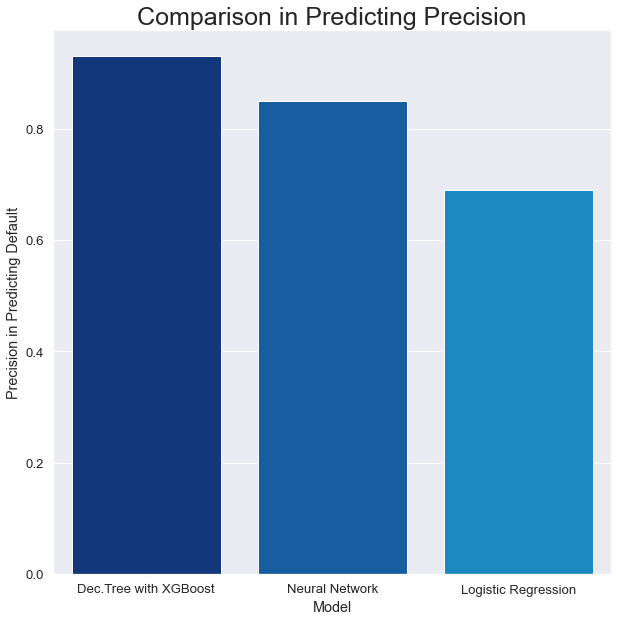

In [92]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
fig2 = sns.barplot(x=accuracy[0],y=accuracy[1], palette=sns.color_palette(primary))
fig2.set_xlabel('Model')
fig2.set_ylabel('Precision in Predicting Default')
fig2.set_title('Comparison in Predicting Precision',fontsize=25)
plt.savefig('charts/Precision1.png')

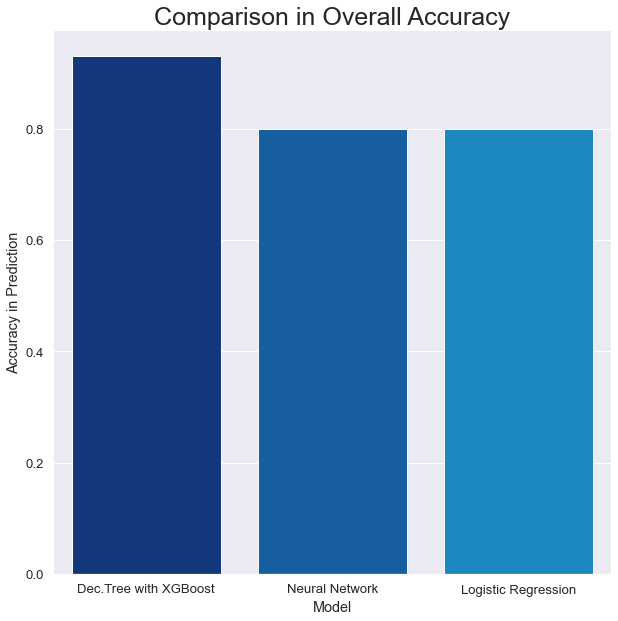

In [11]:
accuracy = pd.DataFrame(data=[['Dec.Tree with XGBoost',0.93],['Neural Network',0.80],['Logistic Regression',0.80]])
accuracy
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
fig2 = sns.barplot(x=accuracy[0],y=accuracy[1], palette=sns.color_palette(primary))
fig2.set_xlabel('Model')
fig2.set_ylabel('Accuracy in Prediction')
fig2.set_title('Comparison in Overall Accuracy',fontsize=25)
plt.savefig('charts/Accuracy.png')

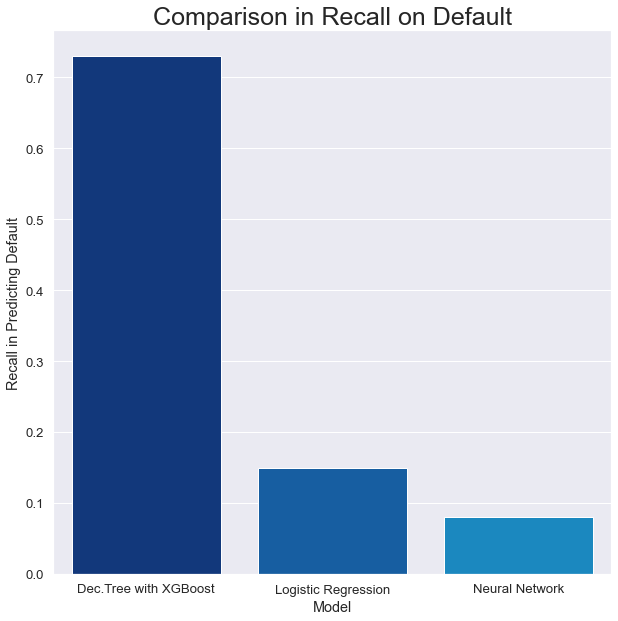

In [12]:
accuracy = pd.DataFrame(data=[['Dec.Tree with XGBoost',0.73],['Logistic Regression',0.15],['Neural Network',0.08]])
accuracy
plt.figure(figsize=(10,10))
sns.set(font_scale=1.2)
fig2 = sns.barplot(x=accuracy[0],y=accuracy[1], palette=sns.color_palette(primary))
fig2.set_xlabel('Model')
fig2.set_ylabel('Recall in Predicting Default')
fig2.set_title('Comparison in Recall on Default',fontsize=25)
plt.savefig('charts/Recall.png')